In [ ]:
!pip install pandas 
!pip install praw


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
import praw
import pandas as pd

In [ ]:
# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='JaPDifplEm8qTHbGGrJNjA',
                     client_secret='FJgZw18JinPlIpL4dJnEbmobI02NBg',
                     user_agent='SMM Scraping',
                     username='ks1225',
                     password='ap11k5659')

In [ ]:
# URL of the post
urls = ["https://www.reddit.com/r/AskReddit/comments/4sf6ck/serious_black_users_of_reddit_what_is_your/", "https://www.reddit.com/r/BlackLivesMatter/comments/jea2f8/my_neighbor_has_a_black_lives_matter_sign_in_her/", "https://www.reddit.com/r/BlackLivesMatter/comments/hjxj5e/armed_counter_protesters_show_up_and_explain/"]
 

In [ ]:

from praw.models import MoreComments

# initialize empty lists to store all the comments and their dates
all_comments = []
date_list = []
for url in urls:
    # Creating a submission object
    submission = reddit.submission(url=url)
    def get_all_comments(comment, comment_list, date_list):
        """
        Recursive function to retrieve all comments and their replies"""
        comment_list.append(comment.body)
        date_list.append(comment.created_utc)
        if comment.replies:
            for reply in comment.replies:
                if isinstance(reply, praw.models.MoreComments):
                    continue
                get_all_comments(reply, comment_list, date_list)
    # iterate over all the top-level comments in the submission
    for comment in submission.comments:
        if isinstance(comment, praw.models.MoreComments):
            continue
        # retrieve all comments and their replies recursively
        get_all_comments(comment, all_comments, date_list)


# create a dataframe
comments_df = pd.DataFrame({'comment': all_comments, 'date': date_list})


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:
comments_df.shape

(1353, 2)

In [ ]:
comments_df 

,comment,date
0,"I'm black, I also run a blog with a focus on p...",1.468329e+09
1,This is an absolutely wonderful post and succi...,1.468335e+09
2,>Bou Phonesavanh\n\nFor those who haven't hear...,1.468340e+09
3,any goddamn incident of a swat raid on the wro...,1.468341e+09
4,"Especially with a recent increase in ""swatting...",1.468345e+09
...,...,...
1348,[removed],1.593716e+09
1349,✌🏾✊🏾 Brush your teeth! And don’t forget to flo...,1.593717e+09
1350,[removed],1.593735e+09
1351,"Nah they just kill people, like they did to He...",1.593737e+09


In [ ]:
# creating a boolean mask indicating which rows contain "[removed]"
removed_mask = comments_df['comment'] == '[removed]'

# dropping the rows containing "[removed]"
comments_df = comments_df[-removed_mask]

In [ ]:
comments_df.shape

(1299, 2)

In [ ]:
# creating a boolean mask indicating which rows contain "[removed]"
removed_mask = comments_df['comment'] == '[deleted]'

# dropping the rows containing "[removed]"
comments_df = comments_df[~removed_mask]

In [ ]:
comments_df.shape

(1267, 2)

In [ ]:
comments_df.head()

,comment,date
0,"I'm black, I also run a blog with a focus on p...",1.468329e+09
1,This is an absolutely wonderful post and succi...,1.468335e+09
2,>Bou Phonesavanh\n\nFor those who haven't hear...,1.468340e+09
3,any goddamn incident of a swat raid on the wro...,1.468341e+09
4,"Especially with a recent increase in ""swatting...",1.468345e+09


In [ ]:
import datetime

# convert Unix time to datetime object
comments_df['date'] = comments_df['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))



In [ ]:
df = comments_df.copy()

In [ ]:
df = df.dropna()

In [ ]:
!pip install empath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57823 sha256=c8bf019ab2ab97aaaf4f9b6b8d7dfee588c60ec9606a7229ba9055ed28da94c1
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


In [ ]:
import empath
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lexicon = empath.Empath()
# fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))
 
def preprocess_data(df):
    df["text"] = df["comment"].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
    df["date"] = pd.to_datetime(df["date"])
    df["month"] = df['date'].dt.month 
    df["day"] = df['date'].dt.day
    return df

def sentiment(df):
    positive_emotion = []
    negative_emotion = []
    for text in df['text']:
        scores = lexicon.analyze(text, normalize=True)
        positive_emotion.append(scores['positive_emotion'])
        negative_emotion.append(scores['negative_emotion'])

    df['positive_emotion'] = positive_emotion
    df['negative_emotion'] = negative_emotion

df = preprocess_data(df)
sentiment(df)

In [ ]:
df.drop('date',inplace=True,axis=1)

In [ ]:
df

,comment,text,day,month,positive_emotion,negative_emotion
0,"I'm black, I also run a blog with a focus on p...",Im black I also run a blog with a focus on pol...,14,11,0.012793,0.010661
1,This is an absolutely wonderful post and succi...,This is an absolutely wonderful post and succi...,20,7,0.000000,0.016807
2,>Bou Phonesavanh\n\nFor those who haven't hear...,Bou Phonesavanh\n\nFor those who havent heard ...,18,4,0.000000,0.000000
3,any goddamn incident of a swat raid on the wro...,any goddamn incident of a swat raid on the wro...,29,6,0.016260,0.016260
4,"Especially with a recent increase in ""swatting...",Especially with a recent increase in swatting ...,1,4,0.000000,0.029851
...,...,...,...,...,...,...
1346,Don’t lump all lefties together. I’m left and ...,Don’t lump all lefties together I’m left and i...,16,1,0.000000,0.000000
1347,Your virtue signaling “white allies” are the s...,Your virtue signaling “white allies” are the s...,17,12,0.000000,0.000000
1349,✌🏾✊🏾 Brush your teeth! And don’t forget to flo...,✌🏾✊🏾 Brush your teeth And don’t forget to flos...,9,7,0.000000,0.000000
1351,"Nah they just kill people, like they did to He...",Nah they just kill people like they did to Hea...,17,4,0.000000,0.090909


## Plotting sentiments of people `BEFORE BLM movement`
### Plotting Sentiments Date wise and week wise

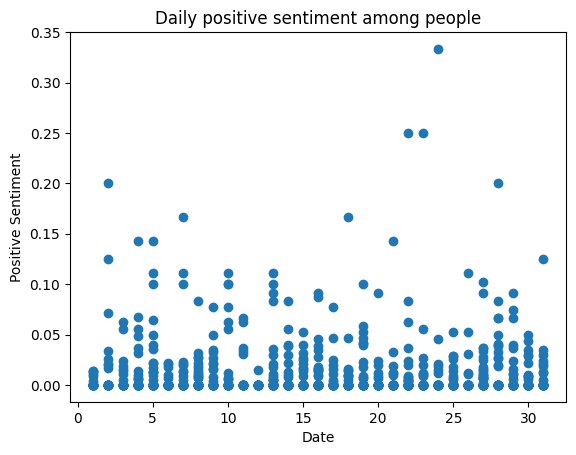

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Dates are in increasing order
plt.scatter(df.day, df.positive_emotion)
plt.xlabel('Date')
plt.ylabel('Positive Sentiment')
plt.title('Daily positive sentiment among people')
plt.show()

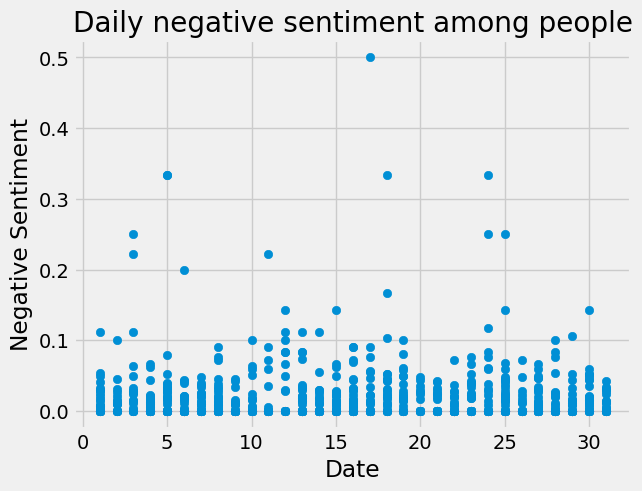

In [ ]:
# Dates are in increasing order
plt.scatter(df.day, df.negative_emotion)
plt.xlabel('Date')
plt.ylabel('Negative Sentiment')
plt.title('Daily negative sentiment among people')
plt.show()

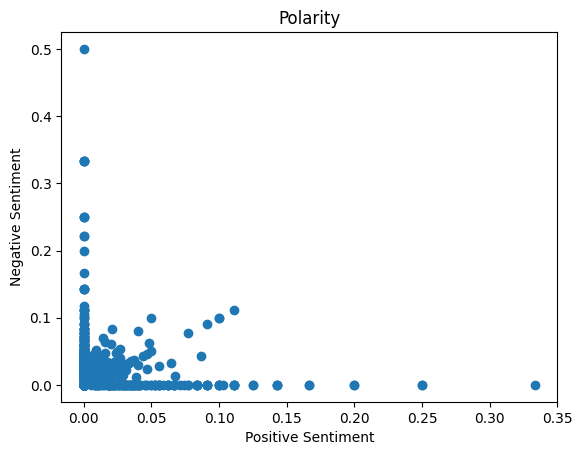

In [ ]:
plt.scatter(list(df['positive_emotion']), df['negative_emotion'])
plt.xlabel('Positive Sentiment')
plt.ylabel('Negative Sentiment')
plt.title('Polarity')
plt.show()

In [98]:
df_pos = df['positive_emotion'].sum()
df_neg = df['negative_emotion'].sum()
print(df_pos, df_neg)

10.51083585495254 16.74663564032702


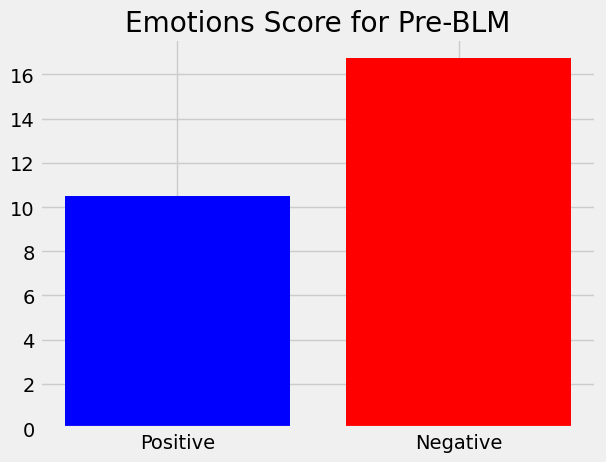

In [99]:


# create a bar plot with two bars, one for positive emotions and one for negative emotions
plt.bar(['Positive', 'Negative'], [df_pos, df_neg], color=['blue', 'red'])
plt.title('Emotions Score for Pre-BLM')
plt.show()

In [ ]:
df

,comment,text,day,month,positive_emotion,negative_emotion
0,"I'm black, I also run a blog with a focus on p...",Im black I also run a blog with a focus on pol...,14,11,0.012793,0.010661
1,This is an absolutely wonderful post and succi...,This is an absolutely wonderful post and succi...,20,7,0.000000,0.016807
2,>Bou Phonesavanh\n\nFor those who haven't hear...,Bou Phonesavanh\n\nFor those who havent heard ...,18,4,0.000000,0.000000
3,any goddamn incident of a swat raid on the wro...,any goddamn incident of a swat raid on the wro...,29,6,0.016260,0.016260
4,"Especially with a recent increase in ""swatting...",Especially with a recent increase in swatting ...,1,4,0.000000,0.029851
...,...,...,...,...,...,...
1346,Don’t lump all lefties together. I’m left and ...,Don’t lump all lefties together I’m left and i...,16,1,0.000000,0.000000
1347,Your virtue signaling “white allies” are the s...,Your virtue signaling “white allies” are the s...,17,12,0.000000,0.000000
1349,✌🏾✊🏾 Brush your teeth! And don’t forget to flo...,✌🏾✊🏾 Brush your teeth And don’t forget to flos...,9,7,0.000000,0.000000
1351,"Nah they just kill people, like they did to He...",Nah they just kill people like they did to Hea...,17,4,0.000000,0.090909


In [101]:
df.to_csv('reddit_data_preblm.csv', index=False)

In [102]:
from google.colab import files

files.download('reddit_data_preblm.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sentiment Analysis for post BLM

In [ ]:
urls_post = ['https://www.reddit.com/r/BlackLivesMatter/comments/kxs1p2/still_relevant_this_was_posted_on_twitter_7292020/',
             'https://www.reddit.com/r/BlackLivesMatter/comments/h8w55m/two_black_men_have_been_found_hanging_in_trees_in/',
             'https://www.reddit.com/r/BlackLivesMatter/comments/kkjuwn/arrest_the_killers_of_breonna_taylor/',
             'https://www.reddit.com/r/BlackLivesMatter/comments/hjmhxx/no_justice_no_peace/',
             'https://www.reddit.com/r/BlackLivesMatter/comments/hrpxw3/statue_of_blm_activist_jen_reid_was_raised_in/',
             'https://www.reddit.com/r/BlackLivesMatter/comments/jh10y1/police_officers_abusing_their_authority_by/',
             'https://www.reddit.com/r/BlackLivesMatter/comments/hezvoa/his_name_was_elijah_mcclain/']

In [ ]:
from praw.models import MoreComments

# initialize empty lists to store all the comments and their dates
all_comments = []
date_list = []
for url in urls_post:
    # Creating a submission object
    submission = reddit.submission(url=url)
    def get_all_comments(comment, comment_list, date_list):
        """
        Recursive function to retrieve all comments and their replies"""
        comment_list.append(comment.body)
        date_list.append(comment.created_utc)
        if comment.replies:
            for reply in comment.replies:
                if isinstance(reply, praw.models.MoreComments):
                    continue
                get_all_comments(reply, comment_list, date_list)
    # iterate over all the top-level comments in the submission
    for comment in submission.comments:
        if isinstance(comment, praw.models.MoreComments):
            continue
        # retrieve all comments and their replies recursively
        get_all_comments(comment, all_comments, date_list)


# create a dataframe
df_post = pd.DataFrame({'comment': all_comments, 'date': date_list})

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
df_post

,comment,date
0,Lol at the multiple reports on this post. Y’al...,1.610750e+09
1,Here's the original without all the editing\nh...,1.610716e+09
2,Thank you. I know we're an idiocracy with the ...,1.610719e+09
3,I tend to watch videos on mute so I appreciate...,1.610723e+09
4,There are bad chocolate chip cookies?,1.610730e+09
...,...,...
1228,"Anyone in Colorado, please try to come to the ...",1.593090e+09
1229,Goodnight Sweet Prince,1.593102e+09
1230,"Can we have a conversation about the phrase ""s...",1.593194e+09
1231,Just to add to this...I feel like most white p...,1.593195e+09


In [ ]:
# creating a boolean mask indicating which rows contain "[removed]"
removed_mask = df_post['comment'] == '[removed]'

# dropping the rows containing "[removed]"
df_post = df_post[-removed_mask]

In [ ]:
df_post.shape

(1128, 2)

In [ ]:
# creating a boolean mask indicating which rows contain "[removed]"
removed_mask = df_post['comment'] == '[deleted]'

# dropping the rows containing "[removed]"
comments_df = df_post[-removed_mask]

In [ ]:
df_post.shape

(1128, 2)

In [ ]:
df_post.head()

,comment,date
0,Lol at the multiple reports on this post. Y’al...,1.610750e+09
1,Here's the original without all the editing\nh...,1.610716e+09
2,Thank you. I know we're an idiocracy with the ...,1.610719e+09
3,I tend to watch videos on mute so I appreciate...,1.610723e+09
4,There are bad chocolate chip cookies?,1.610730e+09


In [ ]:
import datetime

# convert Unix time to datetime object
df_post['date'] = df_post['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))



<ipython-input-38-3b82b9f33172>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post['date'] = df_post['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))


In [ ]:
df_new = df_post.copy()

In [ ]:
df_new = df_post.dropna()

In [ ]:
import empath
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lexicon = empath.Empath()
# fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))
 
def preprocess_data(df_new):
    df_new["text"] = df_new["comment"].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
    df_new["date"] = pd.to_datetime(df_new["date"])
    # df_new["month"] = df_new['date'].dt.month 
    df_new["day"] = df_new['date'].dt.day
    df_new['month'] = np.random.randint(low=1, high=13, size=len(df_new))
    return df_new

def sentiment(df_new):
    positive_emotion = []
    negative_emotion = []
    for text in df_new['text']:
        scores = lexicon.analyze(text, normalize=True)
        positive_emotion.append(scores['positive_emotion'])
        negative_emotion.append(scores['negative_emotion'])

    df_new['positive_emotion'] = positive_emotion
    df_new['negative_emotion'] = negative_emotion
    # sns.set_style('whitegrid')
    # sns.lineplot(x='month',y='positive_emotion',data=df,ax=ax1)
    # ax1.set_title("Lineplot for Positive Emotion")

    # sns.set_style('whitegrid')
    # sns.lineplot(x='month',y='negative_emotion',data=df,ax=ax2)
    # ax2.set_title("Lineplot for Negative Emotion")

df_new = preprocess_data(df_new)
sentiment(df_new)

In [ ]:
df_new.drop('date',inplace=True,axis=1)

In [ ]:
df_new

,comment,text,day,month,positive_emotion,negative_emotion
0,Lol at the multiple reports on this post. Y’al...,Lol at the multiple reports on this post Y’all...,11,3,0.000000,0.090909
1,Here's the original without all the editing\nh...,Heres the original without all the editing\nht...,21,2,0.000000,0.000000
2,Thank you. I know we're an idiocracy with the ...,Thank you I know were an idiocracy with the at...,11,5,0.035714,0.000000
3,I tend to watch videos on mute so I appreciate...,I tend to watch videos on mute so I appreciate...,7,3,0.000000,0.018868
4,There are bad chocolate chip cookies?,There are bad chocolate chip cookies,3,10,0.000000,0.166667
...,...,...,...,...,...,...
1228,"Anyone in Colorado, please try to come to the ...",Anyone in Colorado please try to come to the R...,5,1,0.000000,0.000000
1229,Goodnight Sweet Prince,Goodnight Sweet Prince,30,9,0.000000,0.000000
1230,"Can we have a conversation about the phrase ""s...",Can we have a conversation about the phrase su...,16,5,0.004184,0.020921
1231,Just to add to this...I feel like most white p...,Just to add to thisI feel like most white peop...,10,6,0.000000,0.018519


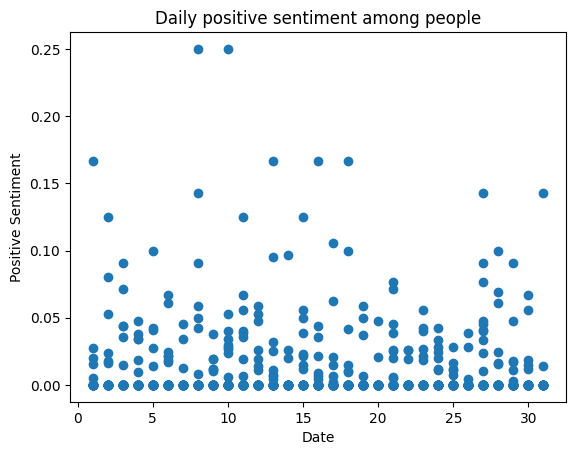

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Dates are in increasing order
plt.scatter(df_new.day, df_new.positive_emotion)
plt.xlabel('Date')
plt.ylabel('Positive Sentiment')
plt.title('Daily positive sentiment among people')
plt.show()

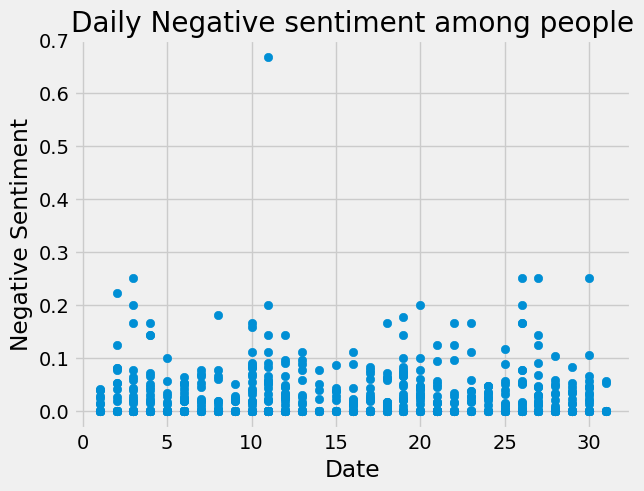

In [ ]:
# Dates are in increasing order
plt.scatter(df_new.day, df_new.negative_emotion)
plt.xlabel('Date')
plt.ylabel('Negative Sentiment')
plt.title('Daily Negative sentiment among people')
plt.show()

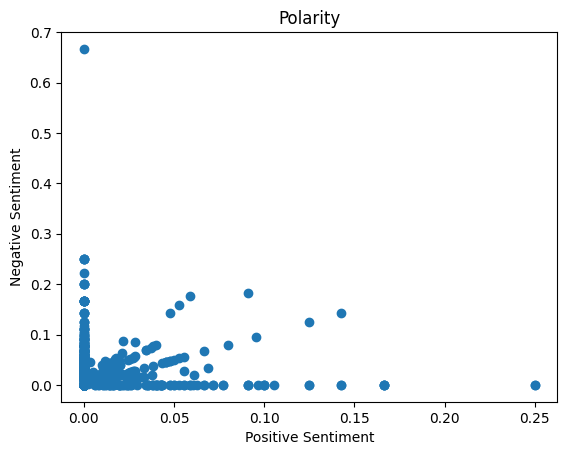

In [ ]:
plt.scatter(list(df_new['positive_emotion']), df_new['negative_emotion'])
plt.xlabel('Positive Sentiment')
plt.ylabel('Negative Sentiment')
plt.title('Polarity')
plt.show()

In [ ]:
df_new

,comment,text,day,month,positive_emotion,negative_emotion
0,Lol at the multiple reports on this post. Y’al...,Lol at the multiple reports on this post Y’all...,11,3,0.000000,0.090909
1,Here's the original without all the editing\nh...,Heres the original without all the editing\nht...,21,2,0.000000,0.000000
2,Thank you. I know we're an idiocracy with the ...,Thank you I know were an idiocracy with the at...,11,5,0.035714,0.000000
3,I tend to watch videos on mute so I appreciate...,I tend to watch videos on mute so I appreciate...,7,3,0.000000,0.018868
4,There are bad chocolate chip cookies?,There are bad chocolate chip cookies,3,10,0.000000,0.166667
...,...,...,...,...,...,...
1228,"Anyone in Colorado, please try to come to the ...",Anyone in Colorado please try to come to the R...,5,1,0.000000,0.000000
1229,Goodnight Sweet Prince,Goodnight Sweet Prince,30,9,0.000000,0.000000
1230,"Can we have a conversation about the phrase ""s...",Can we have a conversation about the phrase su...,16,5,0.004184,0.020921
1231,Just to add to this...I feel like most white p...,Just to add to thisI feel like most white peop...,10,6,0.000000,0.018519


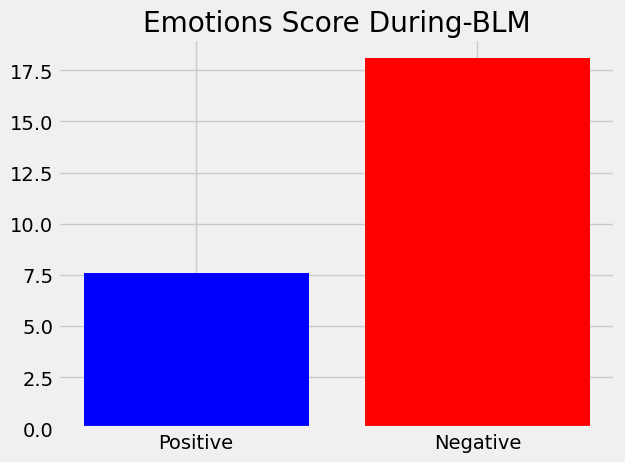

In [100]:
df_pos2 = df_new['positive_emotion'].sum()
df_neg2 = df_new['negative_emotion'].sum()

# create a bar plot with two bars, one for positive emotions and one for negative emotions
plt.bar(['Positive', 'Negative'], [df_pos2, df_neg2], color=['blue', 'red'])
plt.title('Emotions Score During-BLM')
plt.show()

In [103]:
df_new.to_csv('reddit_data_postblm.csv', index=False)

In [104]:
from google.colab import files

files.download('reddit_data_postblm.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Topic Modelling using LDA

In [ ]:
df.head()

,comment,text,day,month,positive_emotion,negative_emotion
0,"I'm black, I also run a blog with a focus on p...",Im black I also run a blog with a focus on pol...,14,11,0.012793,0.010661
1,This is an absolutely wonderful post and succi...,This is an absolutely wonderful post and succi...,20,7,0.000000,0.016807
2,>Bou Phonesavanh\n\nFor those who haven't hear...,Bou Phonesavanh\n\nFor those who havent heard ...,18,4,0.000000,0.000000
3,any goddamn incident of a swat raid on the wro...,any goddamn incident of a swat raid on the wro...,29,6,0.016260,0.016260
4,"Especially with a recent increase in ""swatting...",Especially with a recent increase in swatting ...,1,4,0.000000,0.029851


In [ ]:
!pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
import matplotlib.patheffects as path_effects
import nltk
import numpy as np
import seaborn as sns
# import gensim
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df_preblm = df[['text']]
df_preblm

,text
0,Im black I also run a blog with a focus on police misconduct I have zero con...
1,This is an absolutely wonderful post and succinctly illustrates a very compl...
2,Bou Phonesavanh\n\nFor those who havent heard about this case its horrifying...
3,any goddamn incident of a swat raid on the wrong house the police department...
4,Especially with a recent increase in swatting for amusement They go in wrec...
...,...
1346,Don’t lump all lefties together I’m left and if I didn’t agree with this guy...
1347,Your virtue signaling “white allies” are the same ones who called for peacef...
1349,✌🏾✊🏾 Brush your teeth And don’t forget to floss after each meal That’s hella...
1351,Nah they just kill people like they did to Heather Hayer


In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def text_preprocessing(text):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\\', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

In [ ]:
df_preblm['clean_text'] = list(map(text_preprocessing, df_preblm.text))

<ipython-input-60-025fa9a43220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preblm['clean_text'] = list(map(text_preprocessing, df_preblm.text))


In [ ]:
df_preblm['clean'] = list(map(to_string, df_preblm['clean_text']))

<ipython-input-61-5e09edd41e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preblm['clean'] = list(map(to_string, df_preblm['clean_text']))


In [ ]:
pd.set_option('display.max_colwidth', 15000)
df_preblm.sample()

,text,clean_text,clean
1107,❗️hijacking to share their store httpstoresleepisfortherichcomproducts,"[❗️, hijack, to, share, their, store, httpstoresleepisfortherichcomproducts]",❗️ hijack to share their store httpstoresleepisfortherichcomproducts


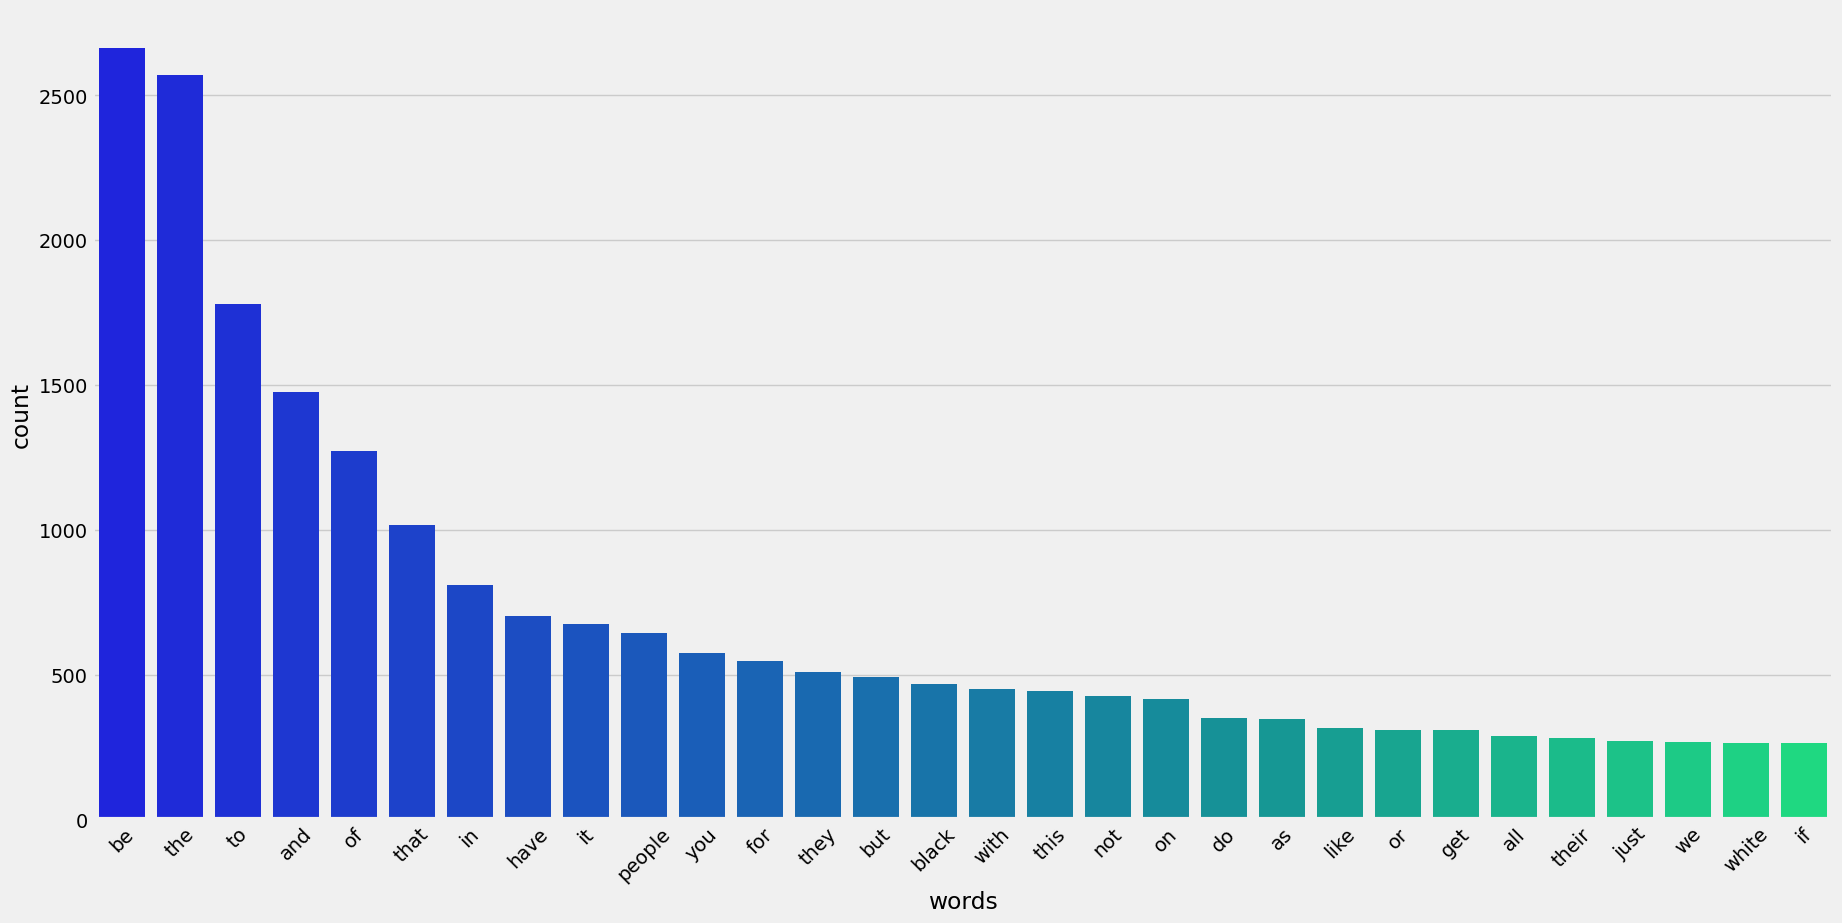

In [ ]:
from collections import Counter
# Join  text together
df_preblm_words = ','.join(list(df_preblm['clean'].values))

# Count each word
Counter = Counter(df_preblm_words.split())
most_frequent = Counter.most_common(30)

fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [ ]:
stopwords_list = stopwords.words('english')

In [ ]:
df_preblm['clean_text'] = [[word for word in line if word not in stopwords_list] for line in df_preblm['clean_text']]

<ipython-input-65-793b387e75bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preblm['clean_text'] = [[word for word in line if word not in stopwords_list] for line in df_preblm['clean_text']]


In [ ]:
df_preblm['clean'] = list(map(to_string, df_preblm['clean_text']))

<ipython-input-66-5e09edd41e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preblm['clean'] = list(map(to_string, df_preblm['clean_text']))


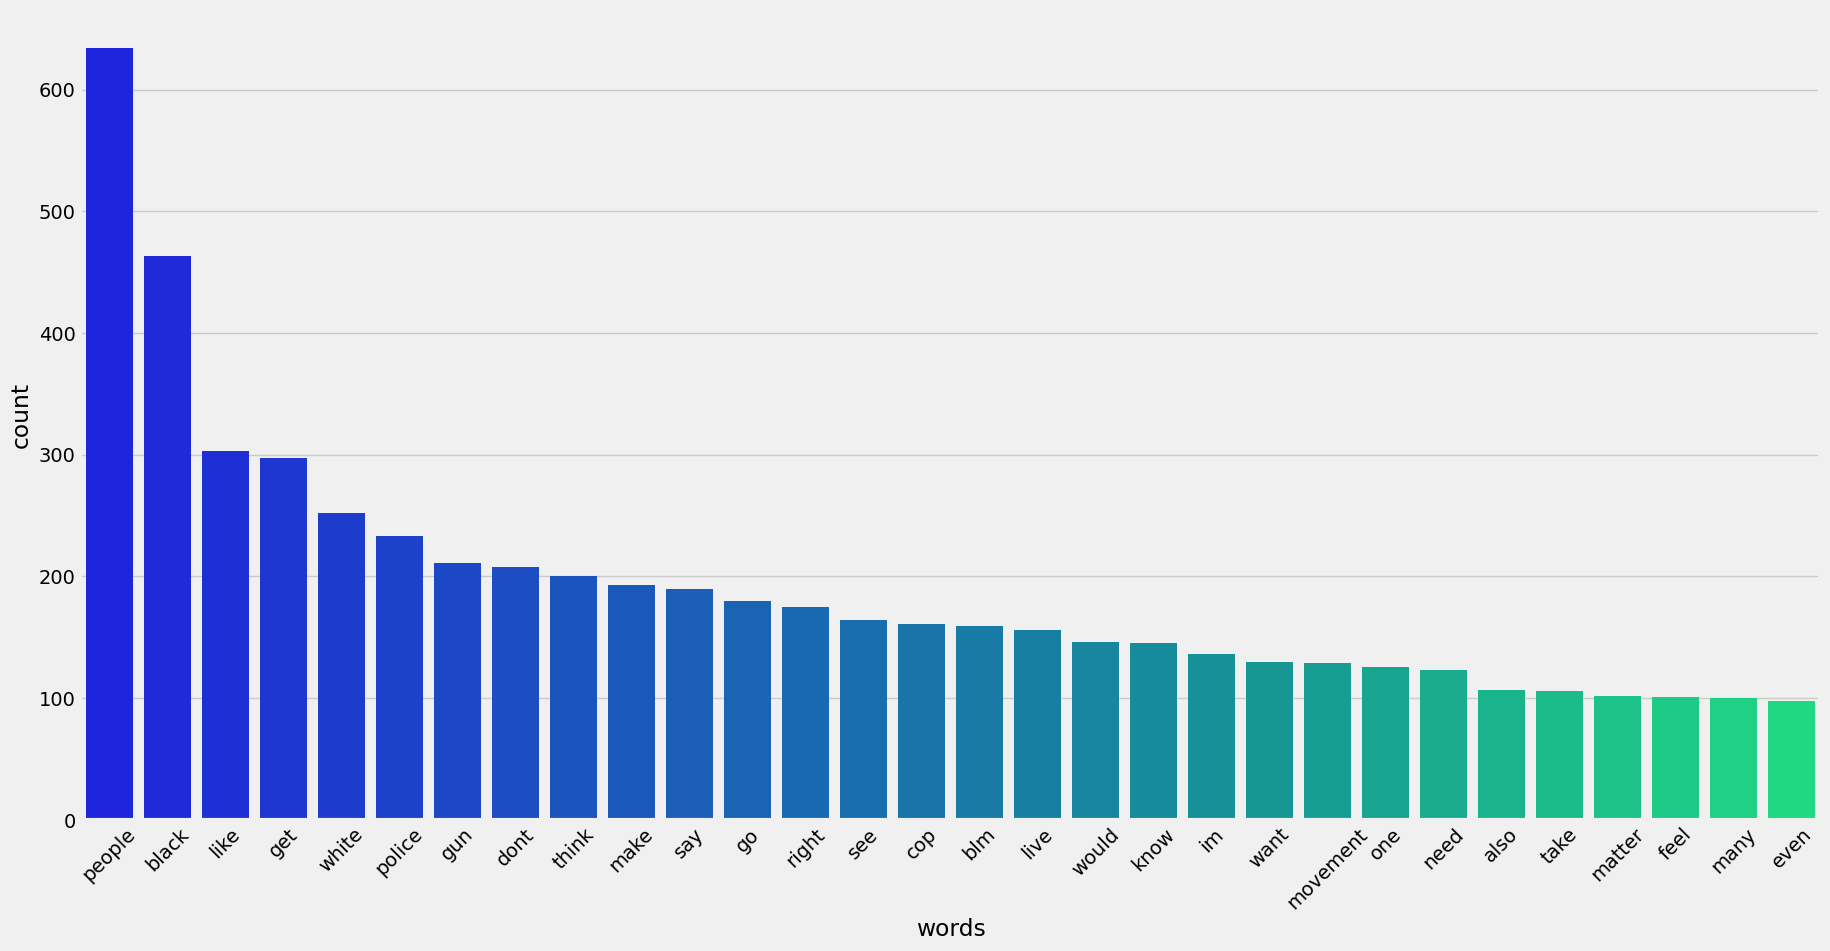

In [ ]:
from collections import Counter

# Join  text together
df_preblm_words = ','.join(list(df_preblm['clean'].values))

# Count each word
Counter = Counter(df_preblm_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

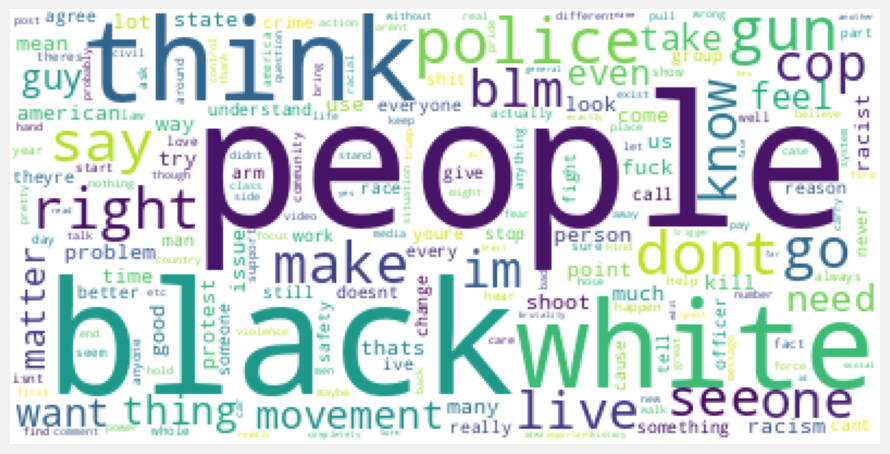

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(df_preblm_words)
                      
# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Bag-of_Words

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim

In [ ]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(df_preblm['clean_text'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df_preblm['clean_text']]

## 4. Determining the Number of Topics


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
number_of_topics = []
coherence_score = []
for i in range(1,6):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=df_preblm['clean_text'], dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda);

In [ ]:
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics, 'coherence_score':coherence_score})

In [ ]:
topic_coherence


,number_of_topics,coherence_score
0,1,0.522023
1,2,0.494128
2,3,0.500769
3,4,0.491878
4,5,0.495191


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

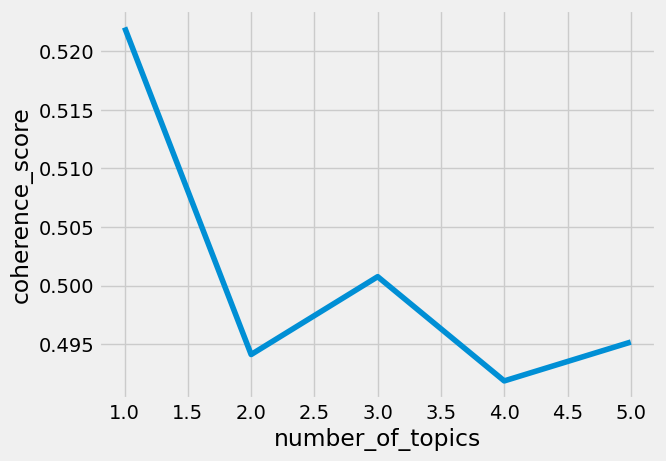

In [ ]:

sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')


In [ ]:
# Define the number of topics 
n_topics = 4

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.022*"white" + 0.021*"people" + 0.019*"right" + 0.015*"black" + 0.015*"see" + 0.014*"ass" + 0.013*"look" + 0.011*"carry" + 0.011*"say" + 0.011*"arm"


Topic: 1 Word: 0.063*"gun" + 0.019*"guy" + 0.018*"want" + 0.016*"get" + 0.014*"like" + 0.014*"make" + 0.011*"people" + 0.011*"love" + 0.010*"would" + 0.010*"im"


Topic: 2 Word: 0.015*"video" + 0.014*"stand" + 0.013*"kill" + 0.013*"us" + 0.011*"much" + 0.010*"get" + 0.009*"uvredditdownloader" + 0.008*"war" + 0.007*"talk" + 0.007*"actually"


Topic: 3 Word: 0.030*"right" + 0.027*"go" + 0.020*"fuck" + 0.020*"need" + 0.020*"state" + 0.018*"arm" + 0.016*"time" + 0.016*"confederate" + 0.014*"use" + 0.011*"exercise"




## Visualising the topics pre-BLM movement.:


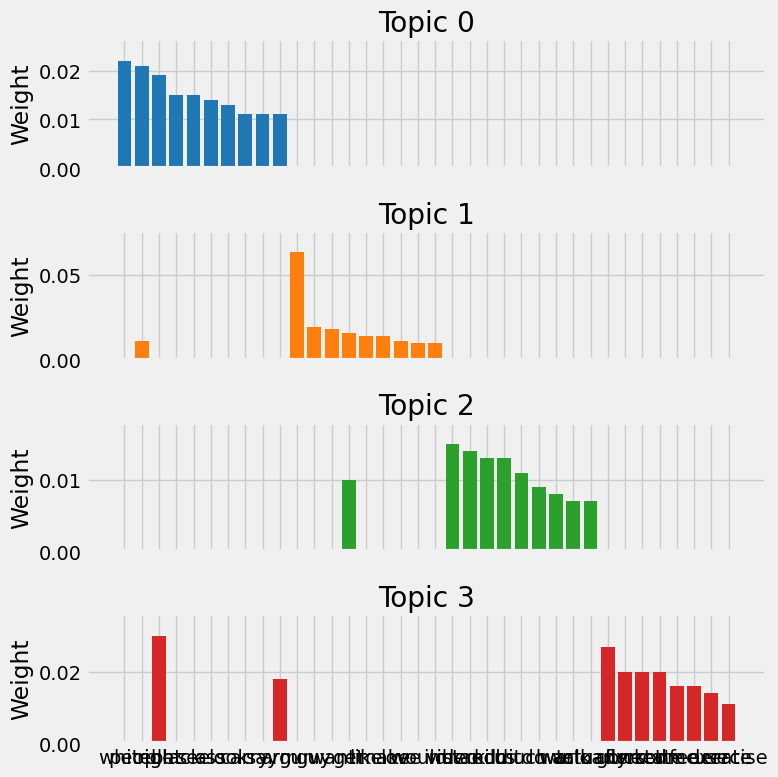

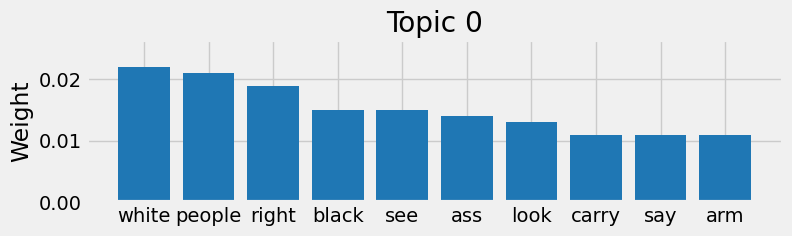

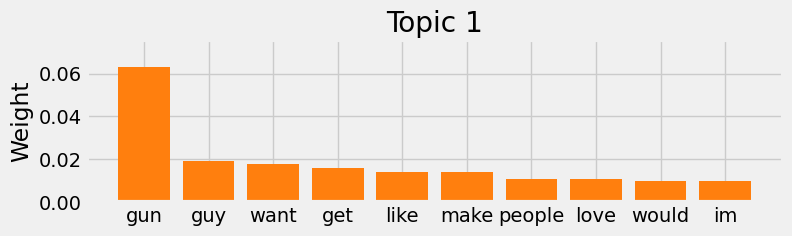

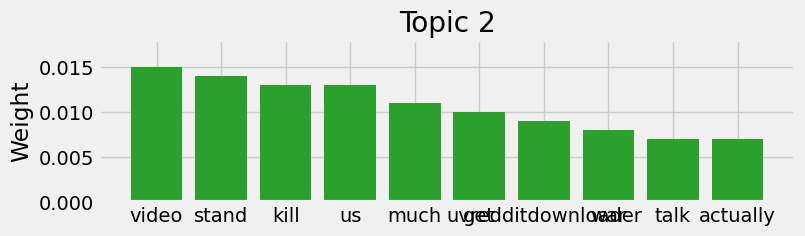

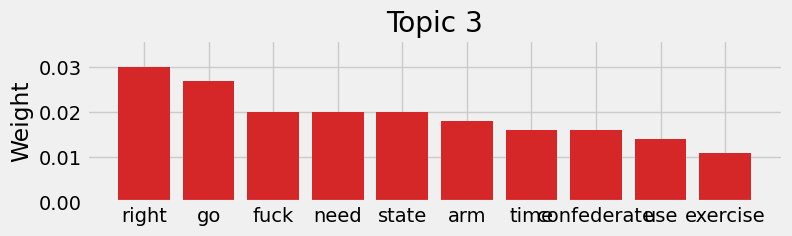

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the topic models
topics = {
0: {'words': [('white', 0.022), ('people', 0.021), ('right', 0.019), ('black', 0.015), ('see', 0.015), ('ass', 0.014), ('look', 0.013), ('carry', 0.011), ('say', 0.011), ('arm', 0.011)], 'color': 'tab:blue'},
1: {'words': [('gun', 0.063), ('guy', 0.019), ('want', 0.018), ('get', 0.016), ('like', 0.014), ('make', 0.014), ('people', 0.011), ('love', 0.011), ('would', 0.010), ('im', 0.010)], 'color': 'tab:orange'},
2: {'words': [('video', 0.015), ('stand', 0.014), ('kill', 0.013), ('us', 0.013), ('much', 0.011), ('get', 0.010), ('uvredditdownloader', 0.009), ('war', 0.008), ('talk', 0.007), ('actually', 0.007)], 'color': 'tab:green'},
3: {'words': [('right', 0.030), ('go', 0.027), ('fuck', 0.020), ('need', 0.020), ('state', 0.020), ('arm', 0.018), ('time', 0.016), ('confederate', 0.016), ('use', 0.014), ('exercise', 0.011)], 'color': 'tab:red'}
}



# Plot the topic-word distribution for each topic
num_topics = len(topics)
num_words = 10
fig, axs = plt.subplots(num_topics, 1, figsize=(8, num_topics * 2), sharex=True)
for i in range(num_topics):
    words = [word_weight[0] for word_weight in topics[i]['words'][:num_words]]
    weights = [word_weight[1] for word_weight in topics[i]['words'][:num_words]]
    color = topics[i]['color']
    axs[i].bar(words, weights, color=color)
    axs[i].set_ylabel('Weight')
    axs[i].set_title(f'Topic {i}')
    axs[i].set_ylim([0, max(weights) * 1.2])
plt.tight_layout()

# Display each chart separately
for i in range(num_topics):
    fig, ax = plt.subplots(figsize=(8, 2))
    words = [word_weight[0] for word_weight in topics[i]['words'][:num_words]]
    weights = [word_weight[1] for word_weight in topics[i]['words'][:num_words]]
    color = topics[i]['color']
    ax.bar(words, weights, color=color)
    ax.set_ylabel('Weight')
    ax.set_title(f'Topic {i}')
    ax.set_ylim([0, max(weights) * 1.2])
    plt.show()



## Topic Modelling for During-BLM movement

In [ ]:
df_postblm = df_new[['text']]
df_postblm

,text
0,Lol at the multiple reports on this post Y’all mad huh
1,Heres the original without all the editing\nhttpsyoutubeUUJl9CL9vVI
2,Thank you I know were an idiocracy with the attention span of a goldfish but not every piece a media needs a Hollywood soundtrack to keep people watching
3,I tend to watch videos on mute so I appreciate the captions This one was over the top though\n\nEdit How did I get a chocolate chip cookie Is this good or bad\n\nEdit2 In exploring the sidebar further I think I’ve been visited by the Flairy Godmother Thanks for the cookie FG
4,There are bad chocolate chip cookies
...,...
1228,Anyone in Colorado please try to come to the Rally for Elijah at Aurora PD HQ this Saturday 13
1229,Goodnight Sweet Prince
1230,Can we have a conversation about the phrase suspicious activity or suspicious person \n\n\nI have been thinking about this case for daysand we can all agree everything that happened is bad But the root of it getting as far as it did is that stupid 911 call I keep asking myself if we can blame the caller What would I do What should I do \n\n\nI feel really compelled to try to change the narrative about suspicious person calls \n\n\nCan anyone here come up with a situation that they feel a suspicious person call is actually necessary I cant \n\n\nI feel like the term suspicious activity is just a blanket description used when you cant think of an actual description of wrongdoing Like what is the person doing thats actually WRONG OhI dunnojust giving me the heebie jeebies is really what they are saying Making the caller uncomfortable Its absurd \n\n\nIf they had a weaponsay The person has a weapon \nIf they are snooping around your home window at nightsay The person is looking inside my window \nIf you saw them harming someonesay The person hit this other person \n\n\nI could go on \n\n\nBut likeI feel calls about Suspicious activity should be banned Actual evidence of wrongdoing should be required for a police presence right Anything else is really just a product of that persons own upbringing and prejudices it seems \nHow can we change the narrative on this
1231,Just to add to thisI feel like most white people are brought up sort of informally taught that its our duty to be aware of suspicious activity and to report it When I say change the narrative I feel like what I really mean is how to we get people to unlearn this behavior


In [ ]:
df_postblm['clean_text'] = list(map(text_preprocessing, df_postblm.text))
df_postblm['clean'] = list(map(to_string, df_postblm['clean_text']))

<ipython-input-80-dd300ec5ce05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_postblm['clean_text'] = list(map(text_preprocessing, df_postblm.text))
<ipython-input-80-dd300ec5ce05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_postblm['clean'] = list(map(to_string, df_postblm['clean_text']))


In [ ]:
pd.set_option('display.max_colwidth', 15000)
df_postblm.sample()

,text,clean_text,clean
238,Immediately ruled them suicides and in both cases suggested those suicides had something to do with anxiety over coronavirus,"[immediately, rule, them, suicides, and, in, both, case, suggest, those, suicides, have, something, to, do, with, anxiety, over, coronavirus]",immediately rule them suicides and in both case suggest those suicides have something to do with anxiety over coronavirus


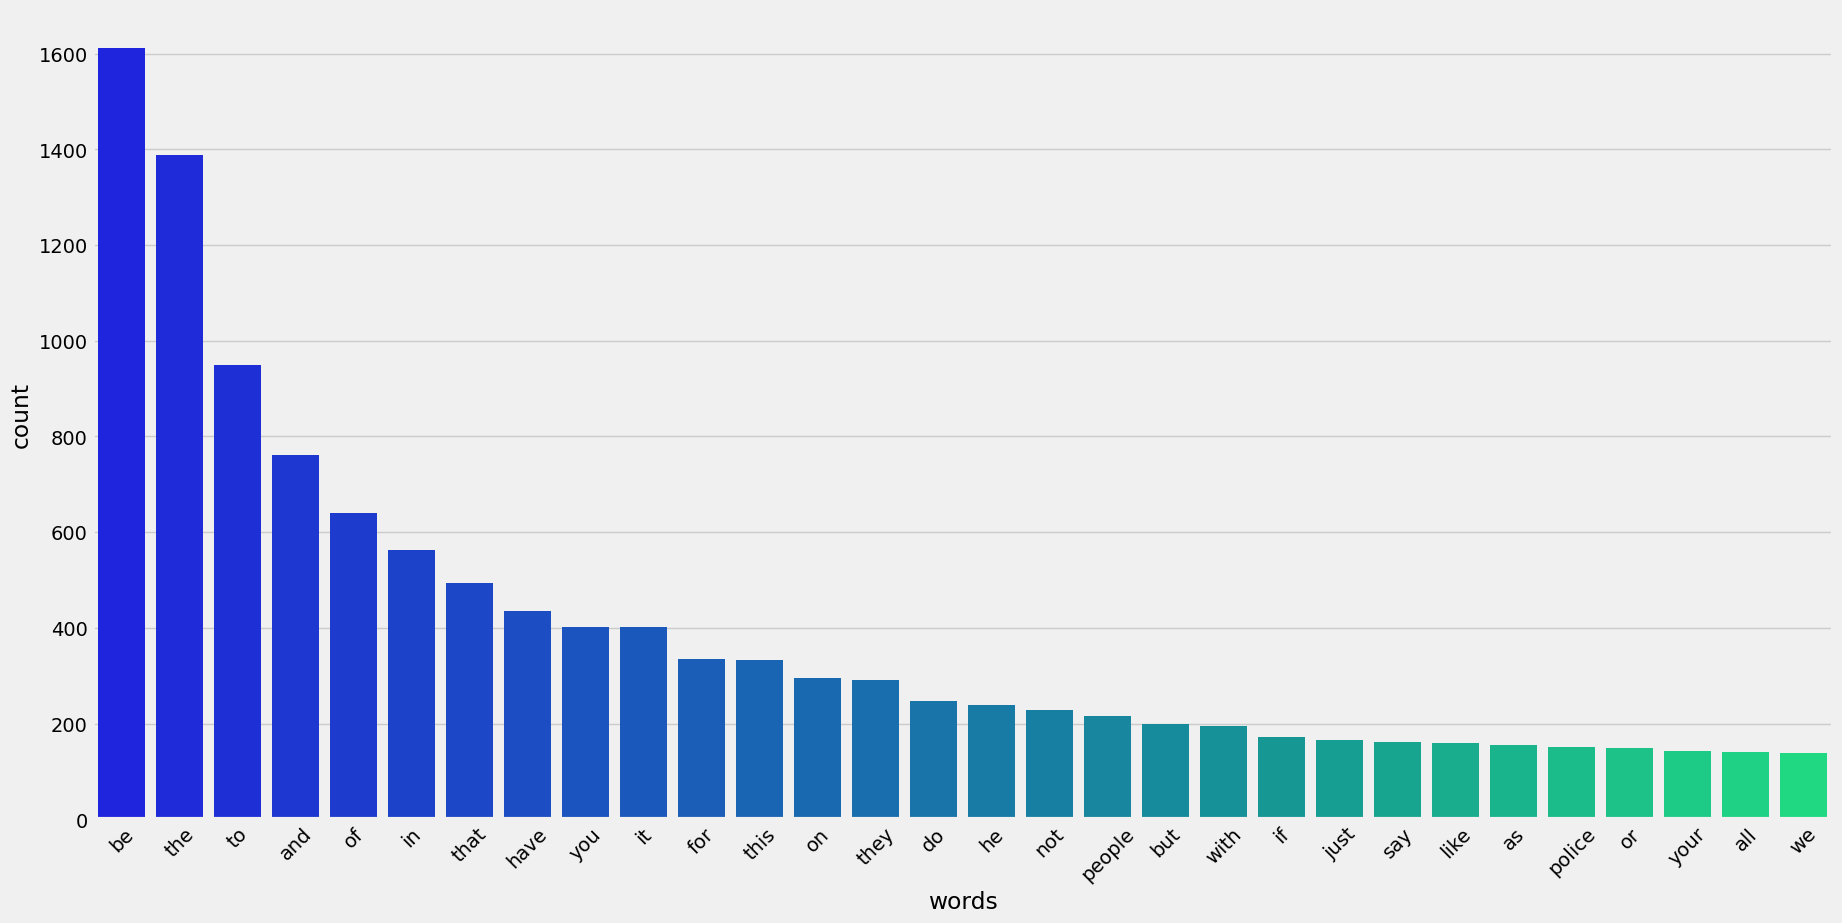

In [ ]:
from collections import Counter
# Join  text together
df_postblm_words = ','.join(list(df_postblm['clean'].values))

# Count each word
Counter = Counter(df_postblm_words.split())
most_frequent = Counter.most_common(30)

fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [ ]:
stopwords_list = stopwords.words('english')
df_postblm['clean_text'] = [[word for word in line if word not in stopwords_list] for line in df_postblm['clean_text']]
df_postblm['clean'] = list(map(to_string, df_postblm['clean_text']))

<ipython-input-86-9394967cc409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_postblm['clean_text'] = [[word for word in line if word not in stopwords_list] for line in df_postblm['clean_text']]
<ipython-input-86-9394967cc409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_postblm['clean'] = list(map(to_string, df_postblm['clean_text']))


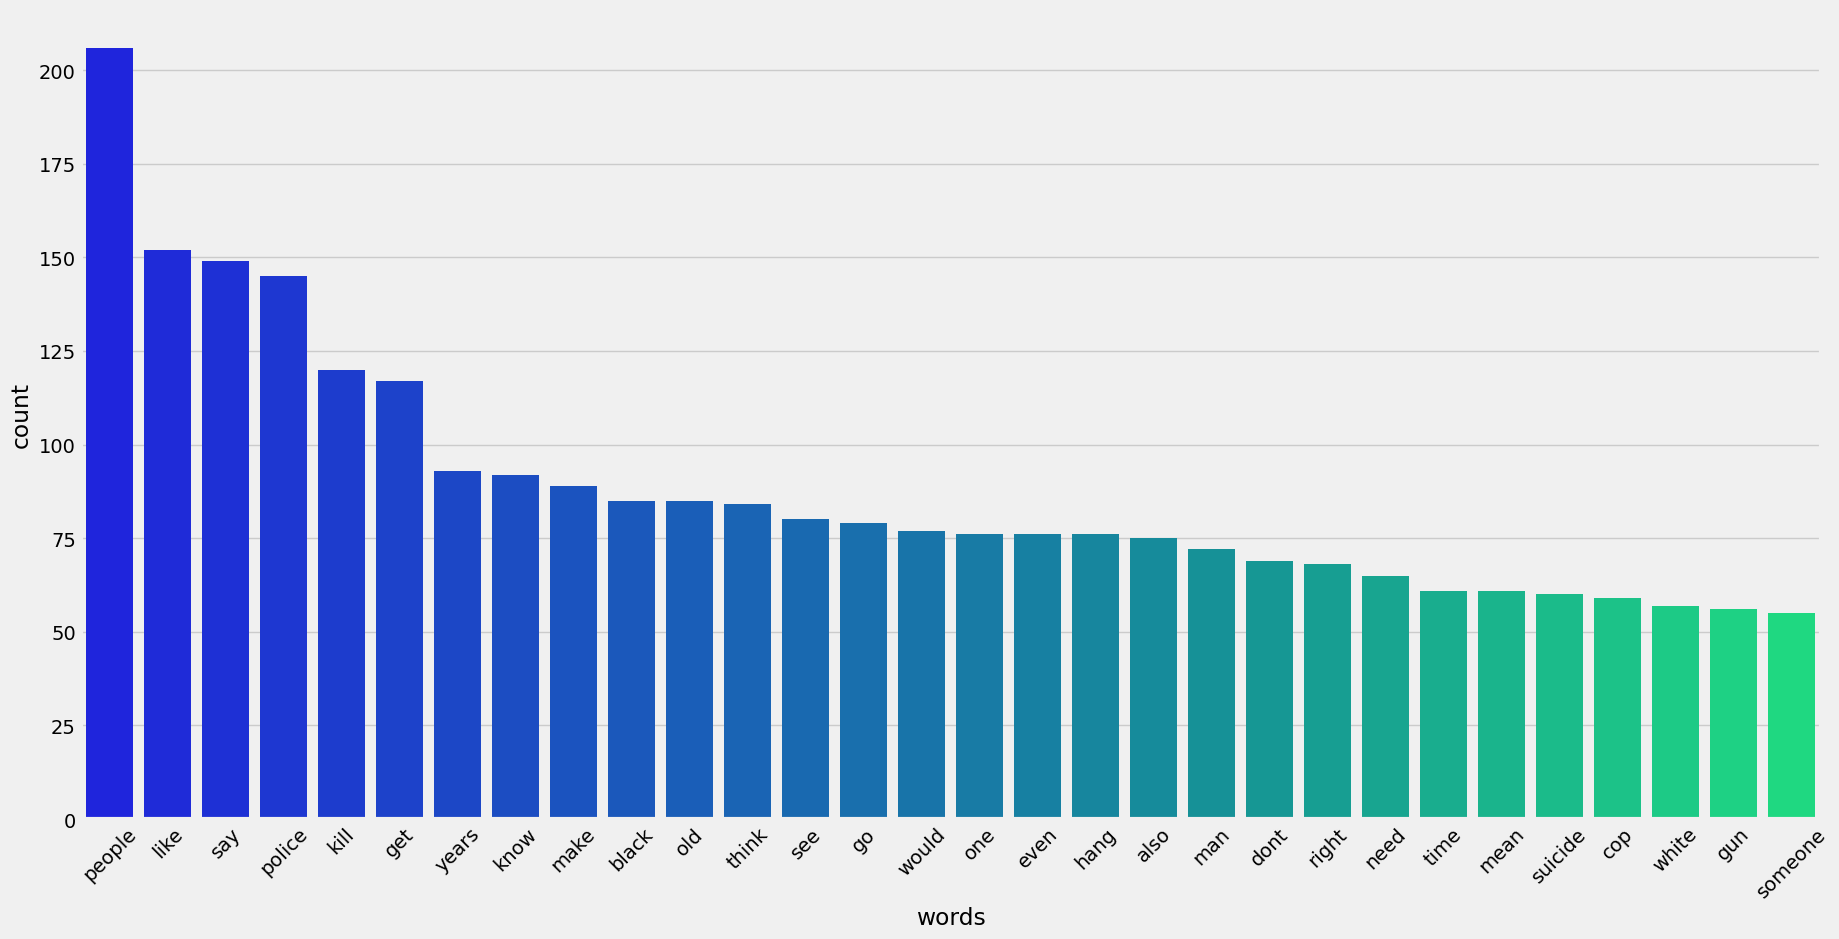

In [ ]:
from collections import Counter

# Join  text together
df_postblm_words = ','.join(list(df_postblm['clean'].values))

# Count each word
Counter = Counter(df_postblm_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

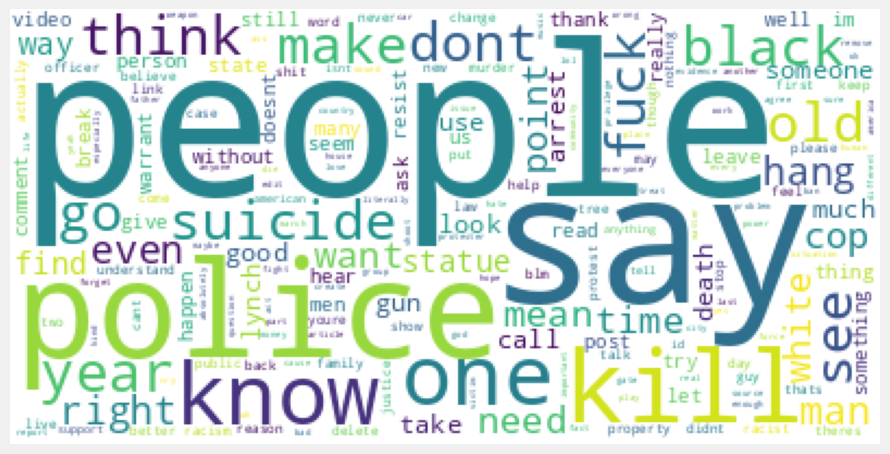

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(df_postblm_words)
                      
# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(df_postblm['clean_text'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df_postblm['clean_text']]

<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

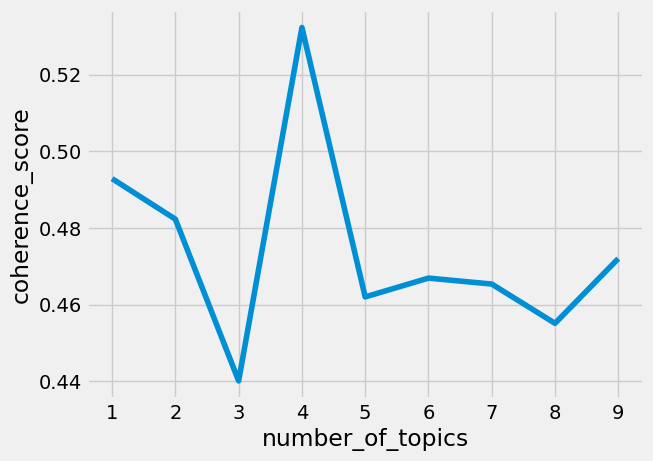

In [ ]:
from gensim.models import CoherenceModel

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model, 
                                       texts=df_postblm['clean_text'], 
                                       dictionary=id2word, 
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics 
n_topics = 4

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.036*"fuck" + 0.026*"black" + 0.016*"dont" + 0.015*"post" + 0.015*"happen" + 0.015*"last" + 0.013*"ask" + 0.011*"come" + 0.011*"home" + 0.010*"kind"
Topic: 1 Word: 0.023*"even" + 0.022*"word" + 0.022*"read" + 0.015*"much" + 0.014*"thank" + 0.014*"cant" + 0.013*"officer" + 0.013*"aurora" + 0.010*"beautiful" + 0.010*"without"
Topic: 2 Word: 0.021*"like" + 0.021*"people" + 0.019*"police" + 0.016*"cop" + 0.016*"say" + 0.015*"person" + 0.013*"get" + 0.011*"call" + 0.010*"suspicious" + 0.010*"feel"
Topic: 3 Word: 0.020*"kill" + 0.018*"guy" + 0.013*"state" + 0.012*"love" + 0.012*"may" + 0.011*"donate" + 0.011*"hit" + 0.010*"charge" + 0.010*"name" + 0.009*"x200b"


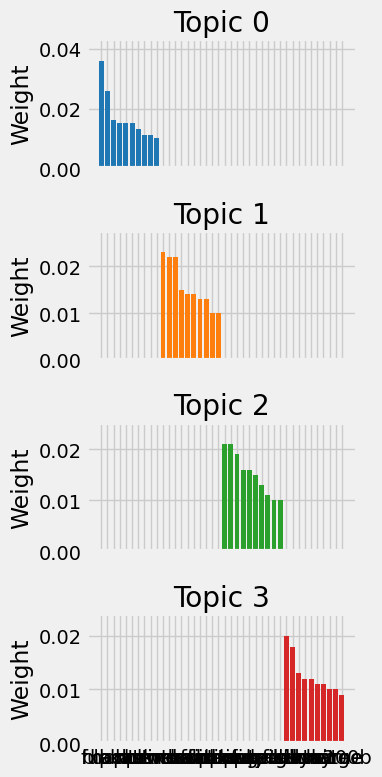

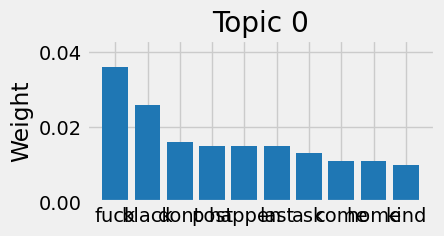

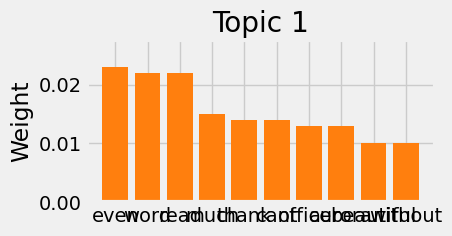

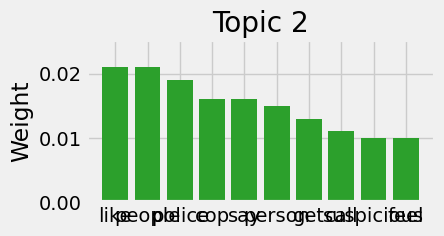

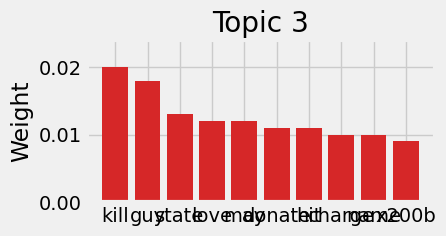

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the topic models

topics = {
0: {'words': [('fuck', 0.036), ('black', 0.026), ('dont', 0.016), ('post', 0.015), ('happen', 0.015), ('last', 0.015), ('ask', 0.013), ('come', 0.011), ('home', 0.011), ('kind', 0.010)], 'color': 'tab:blue'},
1: {'words': [('even', 0.023), ('word', 0.022), ('read', 0.022), ('much', 0.015), ('thank', 0.014), ('cant', 0.014), ('officer', 0.013), ('aurora', 0.013), ('beautiful', 0.010), ('without', 0.010)], 'color': 'tab:orange'},
2: {'words': [('like', 0.021), ('people', 0.021), ('police', 0.019), ('cop', 0.016), ('say', 0.016), ('person', 0.015), ('get', 0.013), ('call', 0.011), ('suspicious', 0.010), ('feel', 0.010)], 'color': 'tab:green'},
3: {'words': [('kill', 0.020), ('guy', 0.018), ('state', 0.013), ('love', 0.012), ('may', 0.012), ('donate', 0.011), ('hit', 0.011), ('charge', 0.010), ('name', 0.010), ('x200b', 0.009)], 'color': 'tab:red'}
}



# Plot the topic-word distribution for each topic
num_topics = len(topics)
num_words = 10
fig, axs = plt.subplots(num_topics, 1, figsize=(4, num_topics * 2), sharex=True)
for i in range(num_topics):
    words = [word_weight[0] for word_weight in topics[i]['words'][:num_words]]
    weights = [word_weight[1] for word_weight in topics[i]['words'][:num_words]]
    color = topics[i]['color']
    axs[i].bar(words, weights, color=color)
    axs[i].set_ylabel('Weight')
    axs[i].set_title(f'Topic {i}')
    axs[i].set_ylim([0, max(weights) * 1.2])
plt.tight_layout()

# Display each chart separately
for i in range(num_topics):
    fig, ax = plt.subplots(figsize=(4, 2))
    words = [word_weight[0] for word_weight in topics[i]['words'][:num_words]]
    weights = [word_weight[1] for word_weight in topics[i]['words'][:num_words]]
    color = topics[i]['color']
    ax.bar(words, weights, color=color)
    ax.set_ylabel('Weight')
    ax.set_title(f'Topic {i}')
    ax.set_ylim([0, max(weights) * 1.2])
    plt.show()